# Digital Signal Processing

### MsCV - ViBOT - MAIA

The reasons to convert signals into frequency domain is to get the idea of different frequency components it is composed of. This might help to detect the required signals and classify them, for examples, speak or speech recognition from a sound wave, noise removal from the image, or finding recurring patterns within images. 

In [11]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from scipy import signal
import matplotlib.pyplot as plt

Pretty printing has been turned ON


# Discrete Fourier Transform
The Discrete Fourier Transform (DFT) converts discrete data from a time domain into frequency domain. The DFT analyzes the finite segment in one period of an infinitely extended periodic signal, which is defined as: 
$$ X[n] = \sum^{N-1}_{k = 0} x[k] e^{-j(2\pi/N)kn}$$


Note: The Fast Fourier Transform (FFT) is simply an algorithm to compute the DFT in a faster way!

## Exercise 1 -  ** DFT** 
**1.1** The DFT of a $5$ Hz sin wave sampled with the sampling of $f_s = 50$ Hz over 1000 (N = 1000) samples is computed as follows:


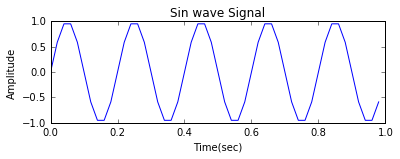

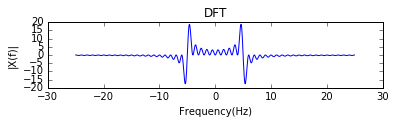

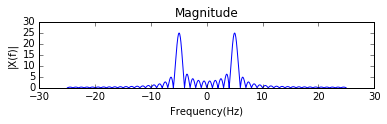

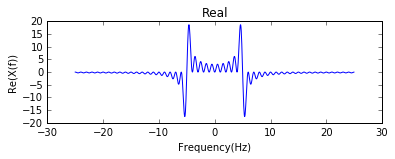

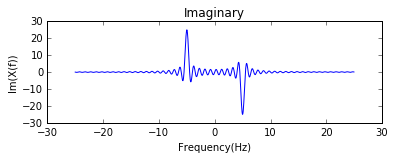

In [23]:
# Signal frequency and sampling frequency
f = 5.
fs = 50.
# time vector for one second
t = np.arange(0, 1., 1./fs)
# sin wave 
x_n = np.sin(2*np.pi*f*t)
# Number of samples 
N = 1000
# frequency vector
fr = (np.arange(-N/2,N/2,1)) * fs/N
# DFT 
# Using fftshift to have the center frequency 
x_f = np.fft.fftshift(np.fft.fft(x_n, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n)
plt.title('Sin wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()


**1.2** Compute the DFT of a cosine wave, how that differs from that of a sine wave ?

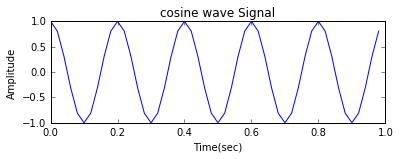

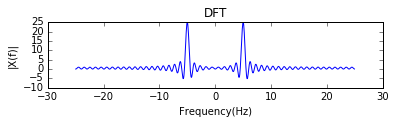

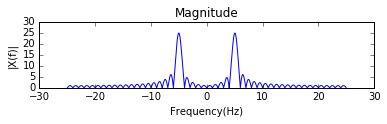

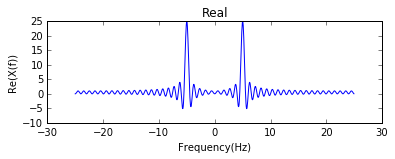

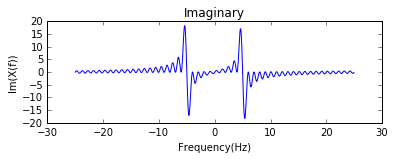

In [24]:
# cosine wave 
x_n_cos = np.cos(2*np.pi*f*t)
# DFT 
# Using fftshift to have the center frequency 
x_f_cos = np.fft.fftshift(np.fft.fft(x_n_cos, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n_cos)
plt.title('cosine wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f_cos)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f_cos))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f_cos))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f_cos))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

**1.3** Use square wave using the same frequncy and sampling frequency.

Note use `signal.square` to create your signal. 

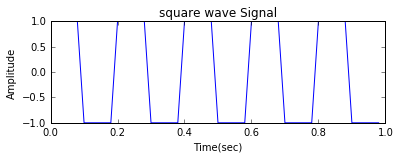

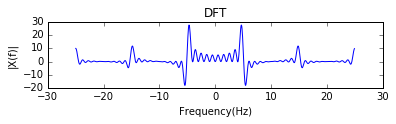

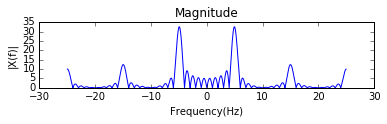

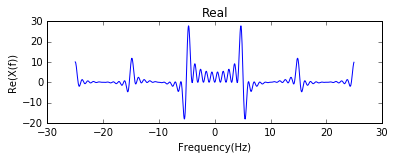

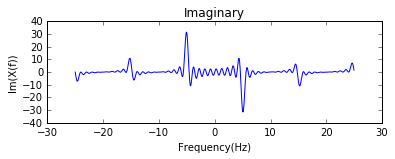

In [25]:
# cosine wave 
x_n_square = signal.square(2*np.pi*f*t)
# DFT 
# Using fftshift to have the center frequency 
x_f_square = np.fft.fftshift(np.fft.fft(x_n_square, N))
#x_f = x_f[0:N/2]

plt.figure
plt.subplot(211)
plt.plot(t, x_n_square)
plt.title('square wave Signal')
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(312)
plt.plot(fr, x_f_square)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(x_f_square))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(x_f_square))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(x_f_square))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

**1.4** Use white Gaussian noise N = 10000. 

(Note use `np.random.normal` to create your noise) 

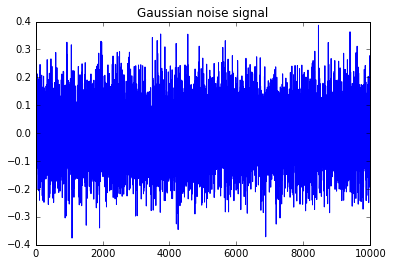

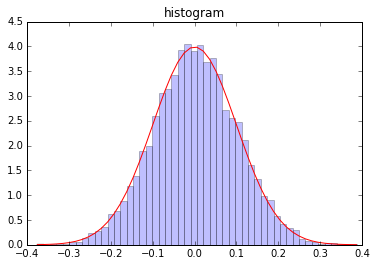

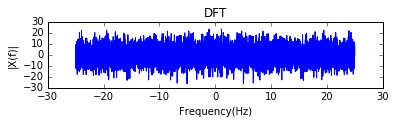

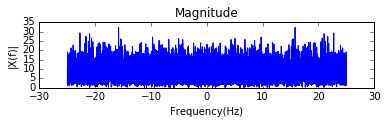

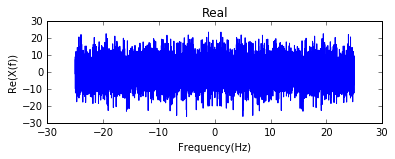

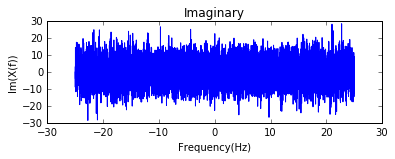

In [27]:
# Size
N1 = 10000
# mean and standard deviation
mu, sigma = 0, 0.1
# frequency vector
fr = (np.arange(-N1/2,N1/2,1)) * fs/N1
# Gaussian Noise
s = np.random.normal(mu, sigma, (N1, ))
# Using fftshift to have the center frequency 
s_f = np.fft.fftshift(np.fft.fft(s, N1))

plt.figure()
plt.plot(s)
plt.title('Gaussian noise signal')
plt.show()

#Histogram
n, bins, patches = plt.hist(s, 50, normed=1, alpha=0.25)

#Plot the distribution
distri = norm.pdf(bins, mu, sigma)
plt.plot(bins, distri, 'r')
plt.title('histogram')
plt.show()

plt.subplot(312)
plt.plot(fr, s_f)
plt.title('DFT')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.subplot(313)
plt.plot(fr, np.abs(s_f))
plt.title('Magnitude')
plt.xlabel('Frequency(Hz)')
plt.ylabel('|X(f)|')
plt.show()

plt.figure
plt.subplot(211)
plt.plot(fr, np.real(s_f))
plt.title('Real')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Re(X(f))')
plt.show()

plt.subplot(212)
plt.plot(fr, np.imag(s_f))
plt.title('Imaginary')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Im(X(f))')
plt.show()

## Exercise 2 -  Sampling 

Generate and display the following signals of 1 sec duration.
$$x[n] = 3 cos(2\pi\frac{f_{1}}{f_{s}}n) + 4 sin(2\pi\frac{f_{2}}{f_{s}}n)$$
for $f_{1} = 5$ Hz and $f_{2} = 20$ Hz, sampled with the sampling frequencies of $f_{s} = [10, 20, 25, 40, 50, 100, 150]$


**2.1** Plot $x[n]$ for different sampling frequencies in time domain.

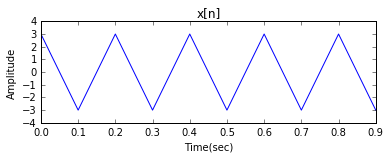

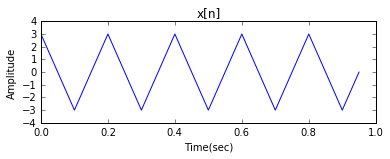

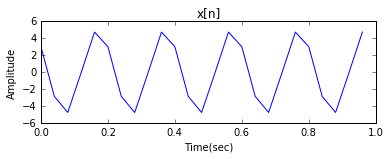

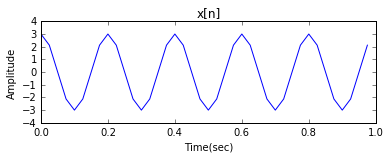

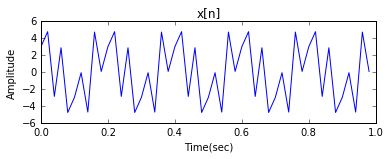

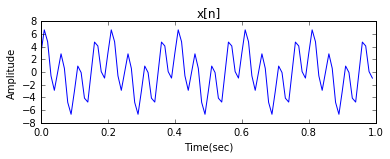

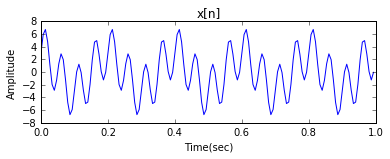

In [41]:
# Signal frequency and sampling frequency
f1 = 5.
f2 = 20.
fs = [10.,20.,25.,40.,50.,100.,150.]

for i in range (len(fs)):
    # time vector for one second
    t = np.arange(0, 1., 1./fs[i])
    x_n1 = (3 * np.cos(2*np.pi*f1*t)) + (4 * np.sin(2*np.pi*f2*t))
    # Plot each signal
    plt.figure
    plt.subplot(211)
    plt.plot(t, x_n1)
    plt.title('x[n]')
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.show()

**2.2.** Discuss the aliasing effects in the time domain:

In the time domain, for low smapling frequencies, the 20Hz frequency components are lost creating aliasing effects in the signals with low sampling frequencies. We start to see the 20Hz components starting from a sampling frequency of 50.0 Hz. We should also consider the fact that the sampling fequency should satisfy the Nyquist criterion.

**2.3** Compute the FFT of the above signals and display their centered frequency components.
Discuss your observations.

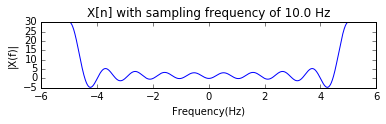

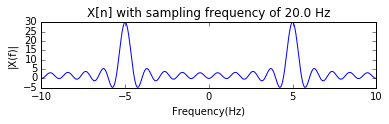

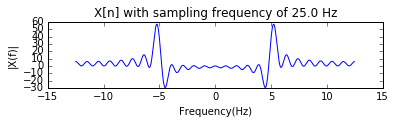

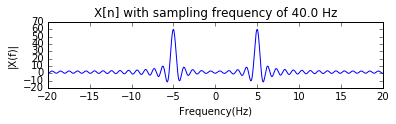

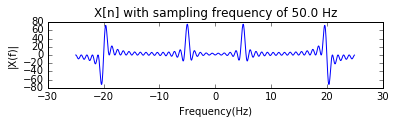

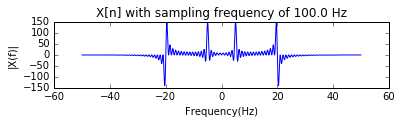

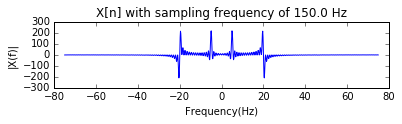

In [43]:
for i in range (len(fs)):
    # time vector for one second
    t = np.arange(0, 1., 1./fs[i])
    x_n1 = (3 * np.cos(2*np.pi*f1*t)) + (4 * np.sin(2*np.pi*f2*t))
    # frequency vector
    fr = (np.arange(-N/2,N/2,1)) * fs[i]/N
    # DFT 
    # Using fftshift to have the center frequency 
    x_f1 = np.fft.fftshift(np.fft.fft(x_n1, N))
    # Plot the frequencies
    plt.subplot(312)
    plt.plot(fr, x_f1)
    plt.title('X[n] with sampling frequency of {} Hz'.format(fs[i]))
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('|X(f)|')
    plt.show()

## Exercise 3 - 1D  DFT for image classification

1D DFT can be applied to analyze the frequency components along the one dimensional profile of an image. Here we want to use these information to classify the images into two different classes (**barcode** and **non-barcode** classes)
To do so we first 
* Load the images from 1D-DFT folder
    * **3.1** you have to normalize and resize the images to the smallest size 
    * **3.2** Take 1D profile as shown in the example and compute its DFT.
![](profile1.png)
    
    * **3.3** Separate the images to two different groups of **barcode** and **non-barcode** based on their frequency spectrum of their profile 
* Some information regarding the images:
    * There are 54 images while Images [1, 2, 6, 44:54] are barcode images and the others are similar patterns.
    
**3.4** Discuss your results

In [3]:
Path = '../images/1D-DFT/'
import os, os.path
from skimage import color
from scipy import misc


filenames = sorted([f for f in os.listdir(Path)])

for f in filenames:
    Img = io.imread(os.path.join(Path,f))
    Img = io.imread(os.path.join(Path,f))
    Img = color.rgb2gray(tem)
    # Normalize your images in the range of [0, 255.]
    # ...
    Img = (Img - np.min(tem))*255./(np.max(tem) - np.min(tem))
    # Resize all your images to the smallest image size 
    # ...
    im_size.append(Img.shape)
    min_size = min(im_size)
    Img = misc.imresize(Img, min_size)
    im.append(Img)
    center_row = 40
   
    spectra = np.zeros((1,min_size[1]))
    spectra = Img[center_row,:]
    i += 1
    DFT = np.fft.fftshift(np.fft.fft(spectra, N))
    
    DFT_magnitude.append(np.abs(np.fft.fft(spectra, N)))
    fr= np.arange(1,N,1)
    DFT_real.append(np.real(np.fft.fft(spectra, N)))
    DFT_imag.append(np.imag(np.fft.fft(spectra, N)))
    
    DFT_magnitude = np.asarray(DFT_magnitude)
DFT_imag = np.asarray(DFT_imag)
DFT_real = np.asarray(DFT_real)

DFT_meanSpectra = [np.mean(f) for f in DFT_magnitude]
DFT_meanReal = [np.mean(f) for f in DFT_real]
DFT_meanImag = [np.mean(f) for f in DFT_imag]



plt.figure
plt.stem(DFT_meanSpectra)
plt.show()

plt.figure
plt.stem(DFT_meanReal)
plt.show()

plt.figure
plt.stem(DFT_meanImag)
plt.show()

NameError: name 'io' is not defined